<a href="https://www.kaggle.com/code/djenanenihadia/titanic-machine-learning-from-disaster?scriptVersionId=196242020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Load dataset

In [55]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Visualize And Prepare dataset

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [60]:
# Fill missing values in 'Age' with the mode of 'Age'
mode_age = train_df['Age'].mode()[0]
train_df['Age'] = train_df['Age'].fillna(mode_age)

# Fill missing values in 'Embarked' with the mode of 'Embarked'
mode_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(mode_embarked)

# Fill missing values in 'Fare' with the mean of 'Fare'
mean_fare = train_df['Fare'].mean()
train_df['Fare'] = train_df['Fare'].fillna(mean_fare)

In [61]:
# Fill missing values in 'Age' with the mode of 'Age'
mode_age = test_df['Age'].mode()[0]
test_df['Age'] = test_df['Age'].fillna(mode_age)

# Fill missing values in 'Embarked' with the mode of 'Embarked'
mode_embarked = test_df['Embarked'].mode()[0]
test_df['Embarked'] = test_df['Embarked'].fillna(mode_embarked)

# Fill missing values in 'Fare' with the mean of 'Fare'
mean_fare = train_df['Fare'].mean()
test_df['Fare'] = test_df['Fare'].fillna(mean_fare)

In [62]:
# Extract the last name from the column, then delete it. 
train_df['Last Name'] = train_df['Name'].str.split(',', expand=True)[0].str.strip()
train_df = train_df.drop(columns=['PassengerId', 'Cabin', 'Name'])

test_df['Last Name'] = test_df['Name'].str.split(',', expand=True)[0].str.strip()
test_df = test_df.drop(columns=['PassengerId', 'Cabin', 'Name'])

In [63]:
# Create a dictionary to store category to ID mappings
categorical_columns = ['Sex', 'Embarked', 'Ticket', 'Last Name']
category_to_id = {}
# Encode each categorical column

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].fillna('Unknown'))  # Replace missing values with 'Unknown' before encoding
    category_to_id[col] = dict(zip(le.classes_, le.transform(le.classes_)))



In [64]:
def apply_mapping(col_name, value, mappings, default=-1):
    return mappings[col_name].get(value, default)

In [65]:
for col in categorical_columns:
    test_df[col] = test_df[col].apply(lambda x: apply_mapping(col, x, category_to_id))


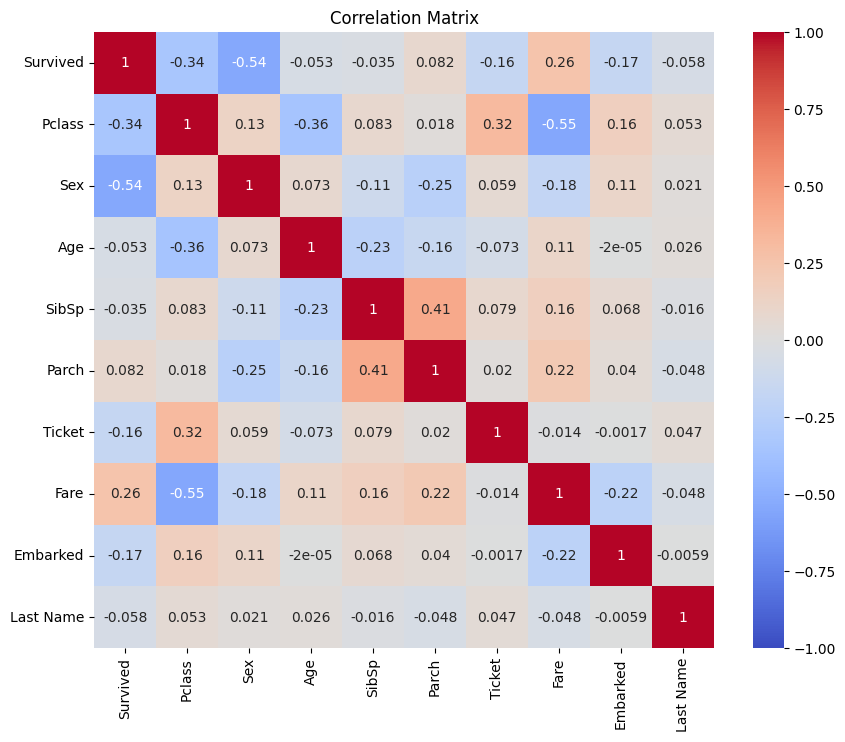

In [67]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [68]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,338.528620,32.204208,1.536476,326.023569
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,200.850657,49.693429,0.791503,193.555742
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000,161.500000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,337.000000,14.454200,2.000000,317.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000,494.500000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000,666.000000


In [69]:
data_array = train_df.to_numpy()
X = data_array[:, 1:]  # All columns except the first column (target)
y = data_array[:, 0]   # The first column (target)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RandomForestClassifier

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000

# Create a pipeline that first scales data and then applies Logistic Regression
pipeline = make_pipeline(scaler, model)

# Fit the model
pipeline.fit(X_train, y_train)
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       105
         1.0       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

